In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import seaborn as sns



In [57]:


MarketCampsdt = pd.read_csv('marketing_campaign.csv', sep='\t')
MarketCampsdt.columns = MarketCampsdt.columns.str.strip()

# Basic inspection
print(MarketCampsdt.head().to_string())
print("\n")
print(MarketCampsdt.info())
print("\n")
print(MarketCampsdt.shape)
print("\n")
print("Data Shape:", MarketCampsdt.shape)
print("\nData Types:\n", MarketCampsdt.dtypes)
print("\nMissing Values:\n", MarketCampsdt.isnull().sum())
print("\nSummary Statistics Of Data:\n", MarketCampsdt.describe(include='all'))



     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response
0  5524        1957  Graduation         Single  58138.0        0         0  04-09-2012       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0              3         11         1
1  2174        1954  Graduation         Single  46344.0        1         1  08-03-2014       38        11          1                6                2                 1             6                  2           

In [58]:
DuplicateRowsum = MarketCampsdt.duplicated().sum()
print("Number of duplicated rows: ",DuplicateRowsum )
print("The Duplicated Rows are: \n", MarketCampsdt[MarketCampsdt.duplicated()])
print("\n")
database_withDuplicatedRowsGone = MarketCampsdt.drop_duplicates()
print("The Database Without the Duplicaed Rows Here \n ", database_withDuplicatedRowsGone.head().to_string())
print("\n")

Number of duplicated rows:  0
The Duplicated Rows are: 
 Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 29 columns]


The Database Without the Duplicaed Rows Here 
       ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response
0  5524        1957  Graduation         Single  58

In [ ]:
Partial_Duplicates_Rows_Count = MarketCampsdt.duplicated(keep=False).sum()
print("The No of Partial Duplicates Rows are: ", Partial_Duplicates_Rows_Count)
print("\n")
MarketCampsdt_no_partial_duplicates = MarketCampsdt.drop_duplicates(subset = MarketCampsdt.columns.difference(['Index']) , keep = 'first')
print(MarketCampsdt_no_partial_duplicates.head().to_string())

The No of Partial Duplicates Rows are:  0


     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response
0  5524        1957  Graduation         Single  58138.0        0         0  04-09-2012       58       635         88              546              172                88            88                  3                8                   10                  4                  7             0             0             0             0             0         0              3         11         1
1  2174        1954  Graduation         Single  46344.0        1         1  08-03-2014       38        11          1                6                2                 1

In [60]:
print("Missing Values in each Column: \n", MarketCampsdt.isnull().sum())
print("\n")
print("Percentage of Missing Values in each Column: \n", (MarketCampsdt.isnull().mean()*100))

Missing_Values_Coloums_Dataframe = pd.DataFrame({
    'Missing_Values_Coloums': MarketCampsdt.isnull().any(),
    'Missing_Values_Count': MarketCampsdt.isnull().sum(),
    'Missing_ValuesIn_Percentage': (MarketCampsdt.isnull().sum() / len(MarketCampsdt)) * 100
})

print(Missing_Values_Coloums_Dataframe.to_string())

Missing Values in each Column: 
 ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


Percentage of Missing Values in each Column: 
 ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 

In [61]:
def Imputation_Of_Values(database):
    for column in database.columns:
        if np.issubdtype(database[column].dtype, np.number):
            median_value = database[column].median()
            database[column] = database[column].fillna(median_value)
            print(f"Filled NaN in numeric column '{column}' with Median = {median_value}")
        
        elif database[column].dtype == 'object':
            mode_value = database[column].mode()[0]
            database[column] = database[column].fillna(mode_value)
            print(f"Filled NaN in categorical column '{column}' with Mode = {mode_value}")
        
        elif np.issubdtype(database[column].dtype, np.datetime64):
            database[column] = database[column].interpolate(method='time')
            print(f"Interpolated missing datetime values in '{column}'")
    
    return database

Database_After_Imputation = Imputation_Of_Values(MarketCampsdt)
print("The Database After Imputation of Missing Values is : \n", Database_After_Imputation.head().to_string())

Filled NaN in numeric column 'ID' with Median = 5458.5
Filled NaN in numeric column 'Year_Birth' with Median = 1970.0
Filled NaN in categorical column 'Education' with Mode = Graduation
Filled NaN in categorical column 'Marital_Status' with Mode = Married
Filled NaN in numeric column 'Income' with Median = 51381.5
Filled NaN in numeric column 'Kidhome' with Median = 0.0
Filled NaN in numeric column 'Teenhome' with Median = 0.0
Filled NaN in categorical column 'Dt_Customer' with Mode = 31-08-2012
Filled NaN in numeric column 'Recency' with Median = 49.0
Filled NaN in numeric column 'MntWines' with Median = 173.5
Filled NaN in numeric column 'MntFruits' with Median = 8.0
Filled NaN in numeric column 'MntMeatProducts' with Median = 67.0
Filled NaN in numeric column 'MntFishProducts' with Median = 12.0
Filled NaN in numeric column 'MntSweetProducts' with Median = 8.0
Filled NaN in numeric column 'MntGoldProds' with Median = 24.0
Filled NaN in numeric column 'NumDealsPurchases' with Median 

In [ ]:

CopiedMarkeCampsdt = Database_After_Imputation.copy()
print(" Dataset Loaded and Cleaned")
print("Shape:", CopiedMarkeCampsdt.shape)
print("Columns:", CopiedMarkeCampsdt.columns.tolist())

 Dataset Loaded and Cleaned
Shape: (2240, 29)
Columns: ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']


In [ ]:
print("I am trying to make the cluster of the following coloums of the dataset here")


CopiedMarkeCampsdt["TotalSpend"] = (CopiedMarkeCampsdt["MntWines"] + CopiedMarkeCampsdt["MntFruits"] + CopiedMarkeCampsdt["MntMeatProducts"] +
                    CopiedMarkeCampsdt["MntFishProducts"] + CopiedMarkeCampsdt["MntSweetProducts"] + CopiedMarkeCampsdt["MntGoldProds"])

CopiedMarkeCampsdt["Children"] = CopiedMarkeCampsdt["Kidhome"] + CopiedMarkeCampsdt["Teenhome"]
CopiedMarkeCampsdt["Age"] = 2025 - CopiedMarkeCampsdt["Year_Birth"] 


CopiedMarkeCampsdt["Dt_Customer"] = pd.to_datetime(CopiedMarkeCampsdt["Dt_Customer"], format='%d-%m-%Y')

I am trying to make the cluster of the following coloums of the dataset here


In [64]:

print("I am Selecting the Features That Needs to Be Taken for the Clustering Here")
features = [
    "Income", "Recency", "NumWebPurchases", "NumCatalogPurchases",
    "NumStorePurchases", "NumWebVisitsMonth", "TotalSpend", "Children", "Age"
]

FinalFeatSets = CopiedMarkeCampsdt[features]

I am Selecting the Features That Needs to Be Taken for the Clustering Here


In [ ]:
print("I am Doing the Standardization Step that Needs to Be executed , that I am doing here")
scaler = StandardScaler()
FinalFeatSets_scaled = scaler.fit_transform(FinalFeatSets)

I am Doing the Standardization Step that Needs to Be executed I am doing here


I am Executing the Elbow Plot asked in the Pdf Here!


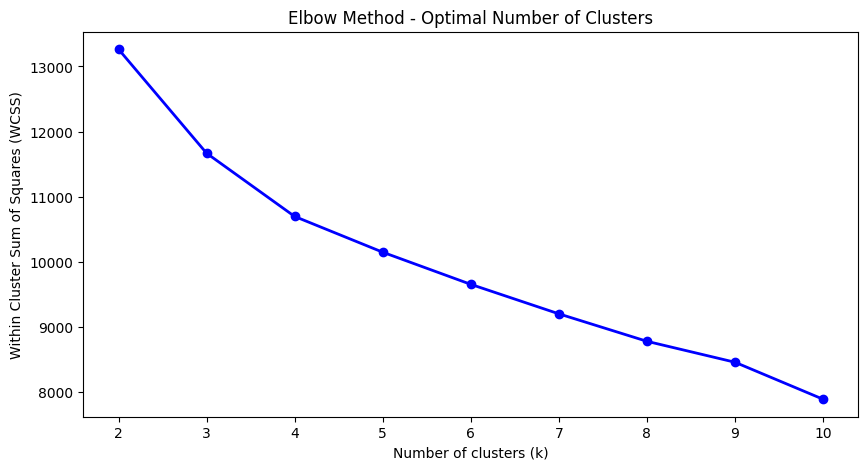

I am Executing the Silhouetter Plot asked in the Pdf Here !


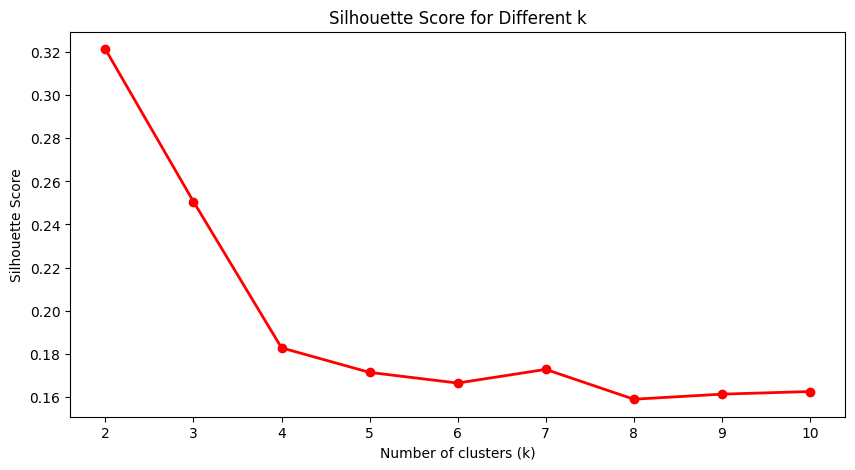

In [66]:
ClusterSum_Sqt = []
silhouette_scores = []

Rangedt = range(2, 11)
for k in Rangedt:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(FinalFeatSets_scaled)
    ClusterSum_Sqt.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(FinalFeatSets_scaled, kmeans.labels_))


print("I am Executing the Elbow Plot asked in the Pdf Here!")
plt.figure(figsize=(10,5))
plt.plot(Rangedt, ClusterSum_Sqt, 'bo-', linewidth=2)
plt.title("Elbow Method - Optimal Number of Clusters")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Within Cluster Sum of Squares (WCSS)")
plt.show()


print("I am Executing the Silhouetter Plot asked in the Pdf Here !")
plt.figure(figsize=(10,5))
plt.plot(Rangedt, silhouette_scores, 'ro-', linewidth=2)
plt.title("Silhouette Score for Different k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()

optimal_k = 4

In [ ]:
print("I am Directly Apploying the K means Clustering Here after Performing the Above  Following Steps!")

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
CopiedMarkeCampsdt["Cluster"] = kmeans.fit_predict(FinalFeatSets_scaled)

print("Clustering completed with", optimal_k, "clusters.")
print(CopiedMarkeCampsdt["Cluster"].value_counts())

I am Directly Apploying the K means Clustering Here after the Following Steps!
Clustering completed with 4 clusters.
Cluster
0    629
1    615
3    507
2    489
Name: count, dtype: int64


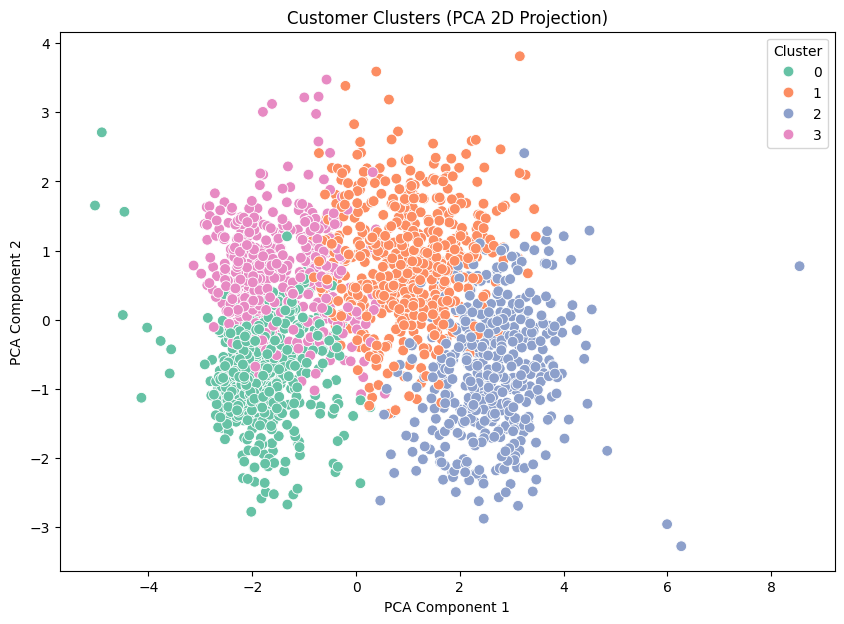

In [68]:
the_comp_pca = PCA(n_components=2)
X_the_comp_pca = the_comp_pca.fit_transform(FinalFeatSets_scaled)

plt.figure(figsize=(10,7))
sns.scatterplot(x=X_the_comp_pca[:,0], y=X_the_comp_pca[:,1], hue=CopiedMarkeCampsdt["Cluster"], palette="Set2", s=60)
plt.title("Customer Clusters (PCA 2D Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()


 Cluster Summary (mean values):

           Income  Recency  NumWebPurchases  NumCatalogPurchases  \
Cluster                                                            
0        30001.64    47.98             2.17                 0.52   
1        61075.67    46.46             7.00                 3.41   
2        78652.54    51.36             4.48                 6.34   
3        43628.01    51.55             2.55                 0.88   

         NumStorePurchases  NumWebVisitsMonth  TotalSpend  Children    Age  \
Cluster                                                                      
0                     3.12               6.91       98.91      0.84  47.93   
1                     8.22               5.61      869.65      1.01  59.23   
2                     8.29               2.29     1392.70      0.11  56.80   
3                     3.75               5.90      155.64      1.83  62.18   

         TotalSpend  
Cluster              
0             98.91  
1            869.65  


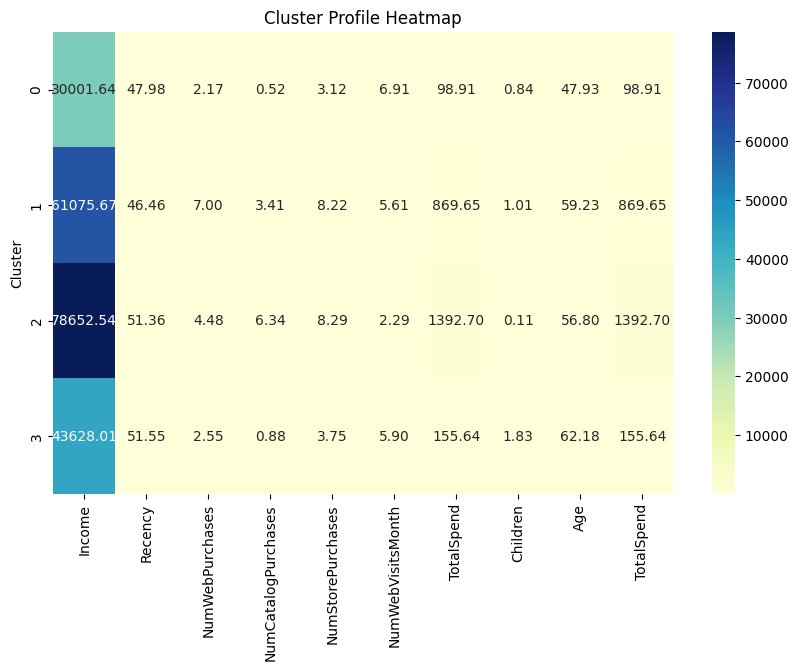

In [69]:
brifclust = CopiedMarkeCampsdt.groupby("Cluster")[features + ["TotalSpend"]].mean().round(2)
print("\n Cluster Summary (mean values):\n")
print(brifclust)

plt.figure(figsize=(10,6))
sns.heatmap(brifclust, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Cluster Profile Heatmap")
plt.show()

In [70]:
overall_avg_spend = CopiedMarkeCampsdt["TotalSpend"].mean()
overall_avg_income = CopiedMarkeCampsdt["Income"].mean()

print("\n Recommendations and Insights:")
for c in brifclust.index:
    print(f"\n--- Cluster {c} ---")
    avg_income = brifclust.loc[c, "Income"]
    if isinstance(avg_income, pd.Series):
       avg_income = avg_income.iloc[0]

    avg_spend = brifclust.loc[c, "TotalSpend"]
    if isinstance(avg_spend, pd.Series):
        avg_spend = avg_spend.iloc[0]

    avg_age = brifclust.loc[c, "Age"]
    if isinstance(avg_age, pd.Series):
        avg_age = avg_age.iloc[0]


    print(f"Average Income: {avg_income:.2f}, Average Spend: {avg_spend:.2f}, Average Age: {avg_age:.1f}")
    if avg_spend > overall_avg_spend and avg_income > overall_avg_income:
        print(" Premium Customers — target with loyalty & high-value offers.")
    elif avg_spend > overall_avg_spend and avg_income < overall_avg_income:
        print(" Value Seekers — offer bundle deals or discounts.")
    elif avg_spend < overall_avg_spend and avg_income > overall_avg_income:
        print(" High-income but low-engagement — focus on personalized marketing.")
    else:
        print(" Low spenders — nurture through awareness campaigns.")


 Recommendations and Insights:

--- Cluster 0 ---
Average Income: 30001.64, Average Spend: 98.91, Average Age: 47.9
 Low spenders — nurture through awareness campaigns.

--- Cluster 1 ---
Average Income: 61075.67, Average Spend: 869.65, Average Age: 59.2
 Premium Customers — target with loyalty & high-value offers.

--- Cluster 2 ---
Average Income: 78652.54, Average Spend: 1392.70, Average Age: 56.8
 Premium Customers — target with loyalty & high-value offers.

--- Cluster 3 ---
Average Income: 43628.01, Average Spend: 155.64, Average Age: 62.2
 Low spenders — nurture through awareness campaigns.
